In [2]:
# libraries
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import json

# settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# getting terrorism data ready
terror = pd.read_csv('data/globalterrorismdb_0617dist.csv',encoding='ISO-8859-1')

In [3]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','City','Latitude','Longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['Casualties']=terror['Killed']+terror['Wounded']

In [4]:
# add country code for each record
name_map = {
    "Venezuela": "VEN",
    "West Germany (FRG)": "DEU",
    "East Germany (GDR)": "DEU",
    "Iran": "IRN",
    "Bolivia": "BOL",
    "South Yemen": "YEM",
    "North Yemen": "YEM",
    "Democratic Republic of the Congo": "COD",
    "People's Republic of the Congo": "COD",
    "Syria": "SYR",
    "Russia": "RUS",
    "South Korea": "KOR",
    "Rhodesia": "ZWE",
    "Taiwan": "TWN",
    "Tanzania": "TZA"
}

mapping = {country.name: country.alpha_3 for country in pycountry.countries}

def get_cc(name):
    if name in name_map:
        return name_map[name]
    return mapping.get(name, None)


terror['CountryCode'] = terror['Country'].apply(lambda country: get_cc(country))
terror.head(3)

,Year,Month,Day,Country,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualties,CountryCode
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0,DOM
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0,MEX
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0,PHL


In [5]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
City              446
Latitude         4606
Longitude        4606
AttackType          0
Killed           9682
Wounded         15325
Target            634
Summary         66138
Group               0
Target_type         0
Weapon_type         0
Motive         121764
Casualties      15826
CountryCode      3210
dtype: int64

In [6]:
# show where no country code was found
terror[terror['CountryCode'].isnull()][['Country', 'CountryCode']]

,Country,CountryCode
1139,West Bank and Gaza Strip,None
1151,Czechoslovakia,None
1341,South Vietnam,None
1897,Yugoslavia,None
1954,Zaire,None
2384,Yugoslavia,None
3686,West Bank and Gaza Strip,None
4606,Zaire,None
4848,Yugoslavia,None
5694,Soviet Union,None


In [7]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1500.0 that took place in Iraq


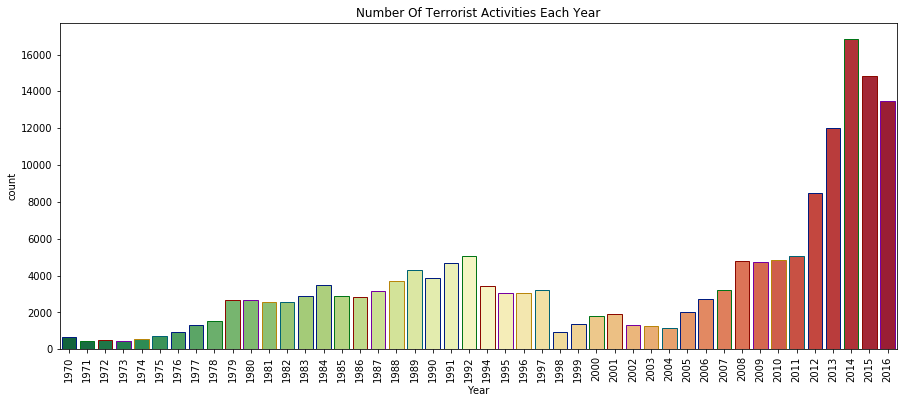

In [8]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

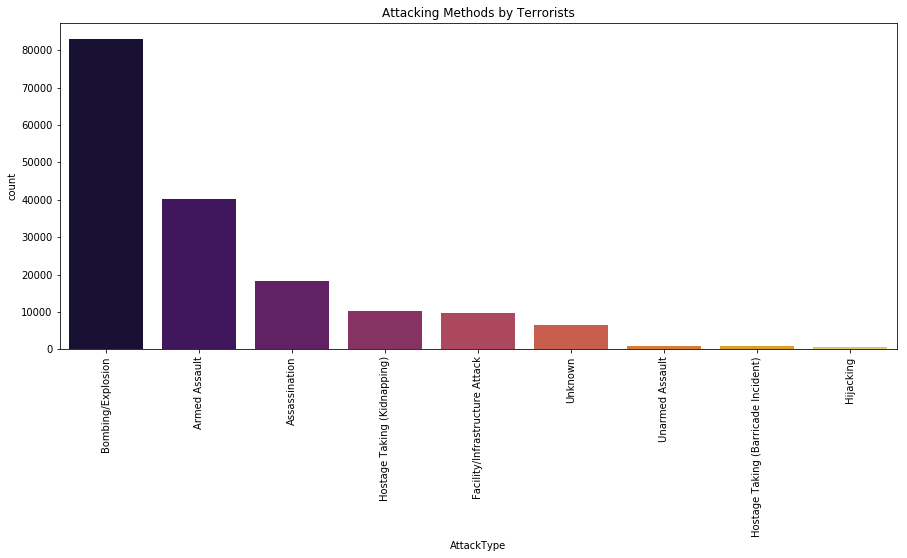

In [9]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

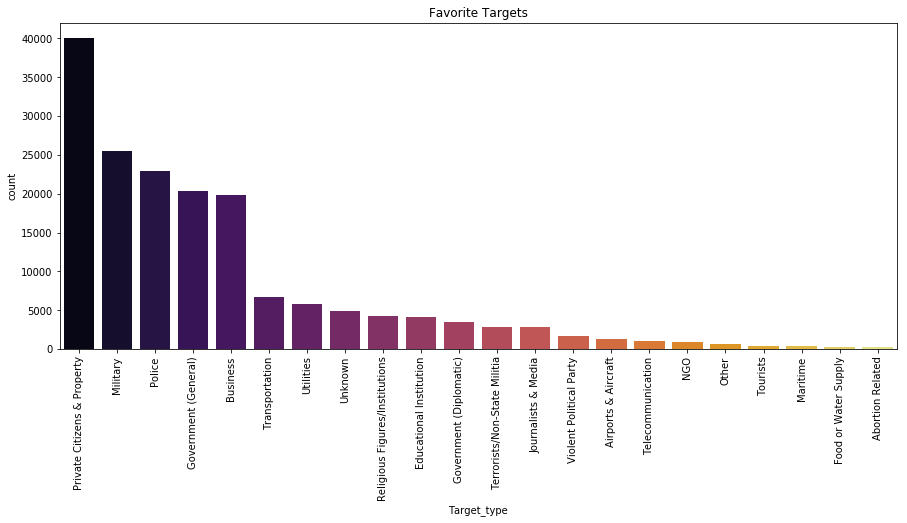

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

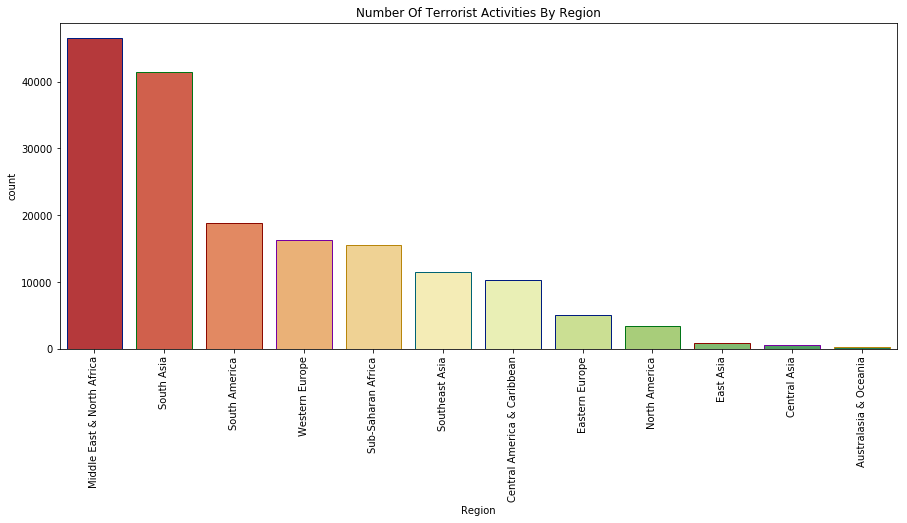

In [11]:
# Terrorism By Region
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=terror,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

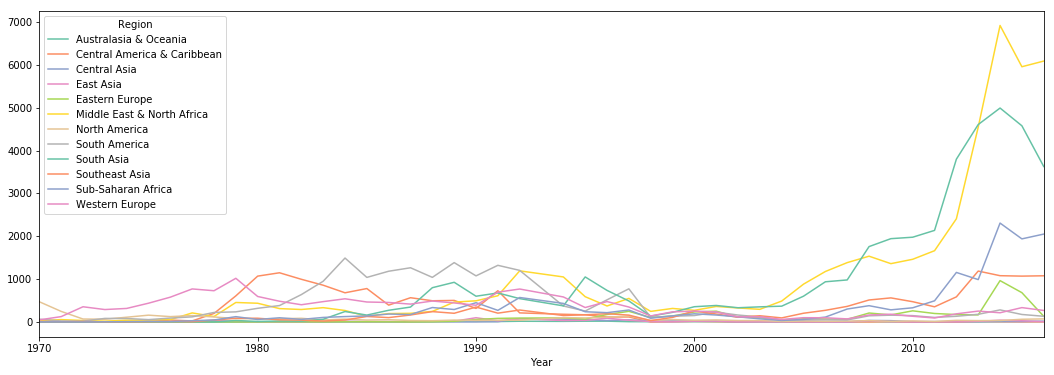

In [12]:
# Trend in Terrorist Activities
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

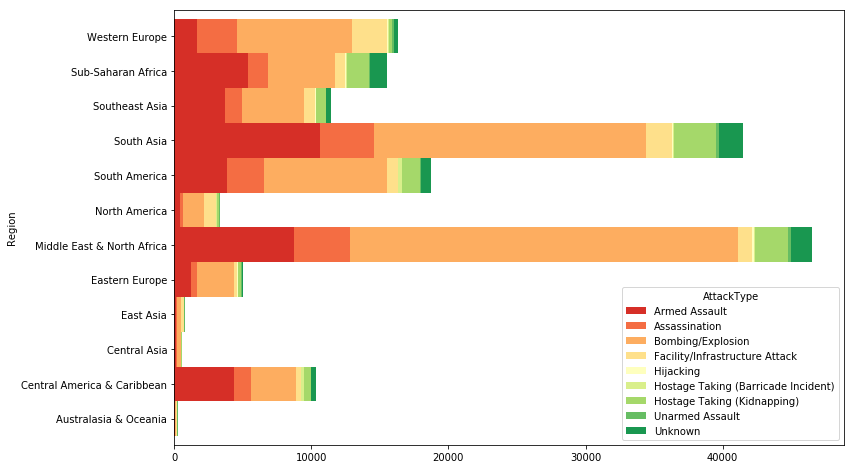

In [13]:
# AttackType vs Region
pd.crosstab(terror.Region,terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [14]:
# export to csv
terror.to_json('data/terror.json', orient='records')

In [15]:
terror.head(1000).to_json('data/terror-test.json', orient='records')

In [21]:
terror_min = terror[['Year', 'Killed', 'CountryCode']]
terror_min.to_json('data/terror-min.json', orient='records')

## Migrations Processing

In [11]:
import pandas as pd
import json
from collections import defaultdict

MIGRATION_THRESHOLD = 1000 #500000

countries = {}
migrations = {'1990': {}, '1995': {}, '2000': {}, '2005': {}, '2010': {}, '2015': {}, '2017': {}}

citiesDF = pd.read_csv("data/cities.csv")
migrationsDF = pd.read_csv("data/unprocessedMigrations.csv")

migrationsDF.head(20)
migrationsDF[migrationsDF['Major area, region, country or area of destination'] == 'Ethiopia']


,Unnamed: 0,Year,Sort order,"Major area, region, country or area of destination",Notes,Code,Type of data (a),Total,Other North,Other South,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Caribbean Netherlands,Cayman Islands,Central African Republic,Chad,Channel Islands,Chile,China,"China, Hong Kong SAR","China, Macao SAR",Colombia,Comoros,Congo,Cook Islands,Costa Rica,Côte d'Ivoire,Croatia,Cuba,Curaçao,Cyprus,Czechia,Dem. People's Republic of Korea,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Faeroe Islands,Falkland Islands (Malvinas),Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guadeloupe,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Martinique,Mauritania,Mauritius,Mayotte,Mexico,Micronesia (Fed. States of),Monaco,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Korea,Republic of Moldova,Réunion,Romania,Russian Federation,Rwanda,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Pierre and Miquelon,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Sint Maarten (Dutch part),Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,State of Palestine,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,TFYR Macedonia,Thailand,Timor-Leste,Togo,Tokelau,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Republic of Tanzania,United States of America,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
17,17,1990,1990018,Ethiopia,NaN,231,B R,1155390,7358,22075,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,19,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,48,..,904,..,..,..,..,..,..,69681,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,71,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,616940,..,384266,..,..,..,53857,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,103,..,..,..,..,..,..,..,..,..,..,..,..,..,68,..,..
287,287,1995,1995018,Ethiopia,NaN,231,B R,806904,10378,31136,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,25,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,63,..,1901,..,..,..,..,..,..,34949,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..

In [12]:
for key, row in citiesDF.iterrows():
    country = row['country']
    city = row['city']
    lat = row['lat']
    lng = row['lng']

    coords = {}

    coords['country'] = country
    coords['city'] = city
    coords['latitude'] = lat
    coords['longitude'] = lng

    countries[country] = coords
# countries

In [13]:
c = 0
for key, row in migrationsDF.iterrows():
    country = row['Major area, region, country or area of destination']
    year = row['Year']
    
    if country in countries:
        for origin, migrants in row.items():
            if origin in countries and country != origin and migrants.isdigit() and int(migrants) > MIGRATION_THRESHOLD:
                migration = {}

                migration['origin'] = countries[origin]
                migration['destination'] = countries[country]
                migration['migrants'] = migrants
                
                ###### 
                c+=1
                print('Country/destination: ', country)
                print('Origin: ', origin)
                print('Migrants: ', migrants)
    
                if not country in migrations[str(year)]:
                    migrations[str(year)][country] = []
                
                migrations[str(year)][country].append(migration) 
    
#     if c > 10:
#         break
    
    
    
    
    


Country/destination:  Burundi
Origin:  Rwanda
Migrants:  221943
Country/destination:  Burundi
Origin:  Uganda
Migrants:  1833
Country/destination:  Comoros
Origin:  Madagascar
Migrants:  10810
Country/destination:  Djibouti
Origin:  Ethiopia
Migrants:  13405
Country/destination:  Djibouti
Origin:  Somalia
Migrants:  101216
Country/destination:  Eritrea
Origin:  Ethiopia
Migrants:  1284
Country/destination:  Eritrea
Origin:  Mozambique
Migrants:  3537
Country/destination:  Eritrea
Origin:  Somalia
Migrants:  1438
Country/destination:  Ethiopia
Origin:  Eritrea
Migrants:  69681
Country/destination:  Ethiopia
Origin:  Somalia
Migrants:  616940
Country/destination:  Ethiopia
Origin:  South Sudan
Migrants:  384266
Country/destination:  Ethiopia
Origin:  Sudan
Migrants:  53857
Country/destination:  Kenya
Origin:  Ethiopia
Migrants:  26695
Country/destination:  Kenya
Origin:  Mozambique
Migrants:  1043
Country/destination:  Kenya
Origin:  Rwanda
Migrants:  3874
Country/destination:  Kenya
Ori

Origin:  France
Migrants:  3167
Country/destination:  Japan
Origin:  Germany
Migrants:  3607
Country/destination:  Japan
Origin:  India
Migrants:  3108
Country/destination:  Japan
Origin:  Indonesia
Migrants:  3624
Country/destination:  Japan
Origin:  Malaysia
Migrants:  4684
Country/destination:  Japan
Origin:  New Zealand
Migrants:  1275
Country/destination:  Japan
Origin:  Pakistan
Migrants:  2068
Country/destination:  Japan
Origin:  Peru
Migrants:  10282
Country/destination:  Japan
Origin:  Philippines
Migrants:  49106
Country/destination:  Japan
Origin:  Singapore
Migrants:  1194
Country/destination:  Japan
Origin:  Sri Lanka
Migrants:  1206
Country/destination:  Japan
Origin:  Thailand
Migrants:  6726
Country/destination:  Japan
Origin:  United Kingdom
Migrants:  10209
Country/destination:  Japan
Origin:  United States of America
Migrants:  38375
Country/destination:  Mongolia
Origin:  China
Migrants:  1649
Country/destination:  Afghanistan
Origin:  Pakistan
Migrants:  8107
Count

Country/destination:  Saudi Arabia
Origin:  Sudan
Migrants:  178769
Country/destination:  Saudi Arabia
Origin:  Yemen
Migrants:  286032
Country/destination:  Turkey
Origin:  Afghanistan
Migrants:  7652
Country/destination:  Turkey
Origin:  Australia
Migrants:  2910
Country/destination:  Turkey
Origin:  Austria
Migrants:  6979
Country/destination:  Turkey
Origin:  Azerbaijan
Migrants:  4062
Country/destination:  Turkey
Origin:  Belgium
Migrants:  4703
Country/destination:  Turkey
Origin:  Bosnia and Herzegovina
Migrants:  6811
Country/destination:  Turkey
Origin:  Bulgaria
Migrants:  462767
Country/destination:  Turkey
Origin:  Cyprus
Migrants:  9195
Country/destination:  Turkey
Origin:  Egypt
Migrants:  2318
Country/destination:  Turkey
Origin:  France
Migrants:  10280
Country/destination:  Turkey
Origin:  Georgia
Migrants:  1575
Country/destination:  Turkey
Origin:  Germany
Migrants:  176820
Country/destination:  Turkey
Origin:  Greece
Migrants:  101752
Country/destination:  Turkey
Or

Migrants:  1194
Country/destination:  United Kingdom
Origin:  Bermuda
Migrants:  61457
Country/destination:  United Kingdom
Origin:  Bosnia and Herzegovina
Migrants:  1816
Country/destination:  United Kingdom
Origin:  Botswana
Migrants:  1955
Country/destination:  United Kingdom
Origin:  Brazil
Migrants:  9560
Country/destination:  United Kingdom
Origin:  Bulgaria
Migrants:  1670
Country/destination:  United Kingdom
Origin:  Canada
Migrants:  63555
Country/destination:  United Kingdom
Origin:  China
Migrants:  23384
Country/destination:  United Kingdom
Origin:  Colombia
Migrants:  5546
Country/destination:  United Kingdom
Origin:  Croatia
Migrants:  1897
Country/destination:  United Kingdom
Origin:  Cyprus
Migrants:  76295
Country/destination:  United Kingdom
Origin:  Denmark
Migrants:  13911
Country/destination:  United Kingdom
Origin:  Egypt
Migrants:  22368
Country/destination:  United Kingdom
Origin:  Ethiopia
Migrants:  1086
Country/destination:  United Kingdom
Origin:  Finland
Mi

Origin:  Bangladesh
Migrants:  1508
Country/destination:  Austria
Origin:  Belgium
Migrants:  1418
Country/destination:  Austria
Origin:  Bosnia and Herzegovina
Migrants:  92349
Country/destination:  Austria
Origin:  Brazil
Migrants:  2857
Country/destination:  Austria
Origin:  Bulgaria
Migrants:  8666
Country/destination:  Austria
Origin:  Canada
Migrants:  1402
Country/destination:  Austria
Origin:  China
Migrants:  9703
Country/destination:  Austria
Origin:  Croatia
Migrants:  43774
Country/destination:  Austria
Origin:  Dominican Republic
Migrants:  1722
Country/destination:  Austria
Origin:  Egypt
Migrants:  8202
Country/destination:  Austria
Origin:  France
Migrants:  4939
Country/destination:  Austria
Origin:  Georgia
Migrants:  1827
Country/destination:  Austria
Origin:  Germany
Migrants:  100832
Country/destination:  Austria
Origin:  Ghana
Migrants:  1363
Country/destination:  Austria
Origin:  Greece
Migrants:  2205
Country/destination:  Austria
Origin:  Hungary
Migrants:  144

Country/destination:  Netherlands
Origin:  Pakistan
Migrants:  6717
Country/destination:  Netherlands
Origin:  Peru
Migrants:  1040
Country/destination:  Netherlands
Origin:  Philippines
Migrants:  3077
Country/destination:  Netherlands
Origin:  Poland
Migrants:  9026
Country/destination:  Netherlands
Origin:  Portugal
Migrants:  7814
Country/destination:  Netherlands
Origin:  Romania
Migrants:  1665
Country/destination:  Netherlands
Origin:  Serbia
Migrants:  14216
Country/destination:  Netherlands
Origin:  Singapore
Migrants:  2193
Country/destination:  Netherlands
Origin:  Somalia
Migrants:  1859
Country/destination:  Netherlands
Origin:  South Africa
Migrants:  6568
Country/destination:  Netherlands
Origin:  Spain
Migrants:  17357
Country/destination:  Netherlands
Origin:  Sri Lanka
Migrants:  4699
Country/destination:  Netherlands
Origin:  Sudan
Migrants:  1725
Country/destination:  Netherlands
Origin:  Suriname
Migrants:  156211
Country/destination:  Netherlands
Origin:  Sweden
M

Origin:  Uruguay
Migrants:  3293
Country/destination:  Peru
Origin:  Argentina
Migrants:  8122
Country/destination:  Peru
Origin:  Brazil
Migrants:  3476
Country/destination:  Peru
Origin:  Chile
Migrants:  5138
Country/destination:  Peru
Origin:  China
Migrants:  2923
Country/destination:  Peru
Origin:  Colombia
Migrants:  4247
Country/destination:  Peru
Origin:  Ecuador
Migrants:  2855
Country/destination:  Peru
Origin:  France
Migrants:  1651
Country/destination:  Peru
Origin:  Germany
Migrants:  2092
Country/destination:  Peru
Origin:  Italy
Migrants:  2393
Country/destination:  Peru
Origin:  Japan
Migrants:  2398
Country/destination:  Peru
Origin:  Mexico
Migrants:  1067
Country/destination:  Peru
Origin:  Spain
Migrants:  3631
Country/destination:  Peru
Origin:  United Kingdom
Migrants:  1185
Country/destination:  Peru
Origin:  United States of America
Migrants:  7050
Country/destination:  Suriname
Origin:  Brazil
Migrants:  2100
Country/destination:  Suriname
Origin:  China
Migr

Country/destination:  Australia
Origin:  New Caledonia
Migrants:  1190
Country/destination:  Australia
Origin:  New Zealand
Migrants:  298309
Country/destination:  Australia
Origin:  Norway
Migrants:  2622
Country/destination:  Australia
Origin:  Pakistan
Migrants:  5949
Country/destination:  Australia
Origin:  Peru
Migrants:  3795
Country/destination:  Australia
Origin:  Philippines
Migrants:  90580
Country/destination:  Australia
Origin:  Poland
Migrants:  74954
Country/destination:  Australia
Origin:  Portugal
Migrants:  19115
Country/destination:  Australia
Origin:  Romania
Migrants:  12241
Country/destination:  Australia
Origin:  Samoa
Migrants:  5709
Country/destination:  Australia
Origin:  Serbia
Migrants:  44312
Country/destination:  Australia
Origin:  Seychelles
Migrants:  2610
Country/destination:  Australia
Origin:  Singapore
Migrants:  27151
Country/destination:  Australia
Origin:  Slovakia
Migrants:  2697
Country/destination:  Australia
Origin:  Slovenia
Migrants:  7227
Co

Origin:  Ireland
Migrants:  4728
Country/destination:  South Africa
Origin:  Israel
Migrants:  1879
Country/destination:  South Africa
Origin:  Italy
Migrants:  8891
Country/destination:  South Africa
Origin:  Kenya
Migrants:  3911
Country/destination:  South Africa
Origin:  Lesotho
Migrants:  130897
Country/destination:  South Africa
Origin:  Malawi
Migrants:  17067
Country/destination:  South Africa
Origin:  Mauritius
Migrants:  3604
Country/destination:  South Africa
Origin:  Mozambique
Migrants:  320659
Country/destination:  South Africa
Origin:  Namibia
Migrants:  23874
Country/destination:  South Africa
Origin:  Netherlands
Migrants:  11283
Country/destination:  South Africa
Origin:  New Zealand
Migrants:  1181
Country/destination:  South Africa
Origin:  Nigeria
Migrants:  10027
Country/destination:  South Africa
Origin:  Pakistan
Migrants:  2469
Country/destination:  South Africa
Origin:  Poland
Migrants:  2497
Country/destination:  South Africa
Origin:  Portugal
Migrants:  1659

Country/destination:  Thailand
Origin:  New Zealand
Migrants:  2194
Country/destination:  Thailand
Origin:  Pakistan
Migrants:  1820
Country/destination:  Thailand
Origin:  Philippines
Migrants:  1146
Country/destination:  Thailand
Origin:  Sri Lanka
Migrants:  6348
Country/destination:  Thailand
Origin:  United States of America
Migrants:  2742
Country/destination:  Armenia
Origin:  Azerbaijan
Migrants:  560521
Country/destination:  Armenia
Origin:  Georgia
Migrants:  27684
Country/destination:  Armenia
Origin:  Greece
Migrants:  3387
Country/destination:  Armenia
Origin:  Lebanon
Migrants:  1198
Country/destination:  Armenia
Origin:  Turkey
Migrants:  2075
Country/destination:  Armenia
Origin:  Ukraine
Migrants:  5665
Country/destination:  Armenia
Origin:  Uzbekistan
Migrants:  1220
Country/destination:  Azerbaijan
Origin:  Armenia
Migrants:  205368
Country/destination:  Azerbaijan
Origin:  Georgia
Migrants:  61233
Country/destination:  Azerbaijan
Origin:  Kazakhstan
Migrants:  4336


Migrants:  1170
Country/destination:  Poland
Origin:  Romania
Migrants:  4061
Country/destination:  Poland
Origin:  Serbia
Migrants:  4056
Country/destination:  Poland
Origin:  Slovakia
Migrants:  1838
Country/destination:  Poland
Origin:  Spain
Migrants:  1348
Country/destination:  Poland
Origin:  Ukraine
Migrants:  375267
Country/destination:  Poland
Origin:  United Kingdom
Migrants:  3192
Country/destination:  Poland
Origin:  United States of America
Migrants:  10929
Country/destination:  Romania
Origin:  Bulgaria
Migrants:  21944
Country/destination:  Romania
Origin:  China
Migrants:  1331
Country/destination:  Romania
Origin:  Germany
Migrants:  2033
Country/destination:  Romania
Origin:  Greece
Migrants:  4350
Country/destination:  Romania
Origin:  Hungary
Migrants:  7522
Country/destination:  Romania
Origin:  Italy
Migrants:  1436
Country/destination:  Romania
Origin:  Serbia
Migrants:  1255
Country/destination:  Romania
Origin:  Turkey
Migrants:  1810
Country/destination:  Roma

Migrants:  35923
Country/destination:  United Kingdom
Origin:  Slovakia
Migrants:  3236
Country/destination:  United Kingdom
Origin:  Somalia
Migrants:  23882
Country/destination:  United Kingdom
Origin:  South Africa
Migrants:  100971
Country/destination:  United Kingdom
Origin:  Spain
Migrants:  44874
Country/destination:  United Kingdom
Origin:  Sri Lanka
Migrants:  51624
Country/destination:  United Kingdom
Origin:  Sudan
Migrants:  5854
Country/destination:  United Kingdom
Origin:  Sweden
Migrants:  16159
Country/destination:  United Kingdom
Origin:  Switzerland
Migrants:  13797
Country/destination:  United Kingdom
Origin:  Thailand
Migrants:  11357
Country/destination:  United Kingdom
Origin:  Trinidad and Tobago
Migrants:  18728
Country/destination:  United Kingdom
Origin:  Tunisia
Migrants:  2644
Country/destination:  United Kingdom
Origin:  Turkey
Migrants:  38795
Country/destination:  United Kingdom
Origin:  Uganda
Migrants:  51083
Country/destination:  United Kingdom
Origin:

Migrants:  1301
Country/destination:  Belgium
Origin:  Cameroon
Migrants:  1640
Country/destination:  Belgium
Origin:  Canada
Migrants:  1910
Country/destination:  Belgium
Origin:  Chile
Migrants:  1196
Country/destination:  Belgium
Origin:  China
Migrants:  3257
Country/destination:  Belgium
Origin:  Denmark
Migrants:  2791
Country/destination:  Belgium
Origin:  Finland
Migrants:  1645
Country/destination:  Belgium
Origin:  France
Migrants:  99667
Country/destination:  Belgium
Origin:  Georgia
Migrants:  1164
Country/destination:  Belgium
Origin:  Germany
Migrants:  30435
Country/destination:  Belgium
Origin:  Ghana
Migrants:  1448
Country/destination:  Belgium
Origin:  Greece
Migrants:  19136
Country/destination:  Belgium
Origin:  Guatemala
Migrants:  1001
Country/destination:  Belgium
Origin:  India
Migrants:  2904
Country/destination:  Belgium
Origin:  Ireland
Migrants:  2655
Country/destination:  Belgium
Origin:  Israel
Migrants:  1661
Country/destination:  Belgium
Origin:  Italy


Origin:  Peru
Migrants:  1437
Country/destination:  Netherlands
Origin:  Philippines
Migrants:  4794
Country/destination:  Netherlands
Origin:  Poland
Migrants:  12398
Country/destination:  Netherlands
Origin:  Portugal
Migrants:  8561
Country/destination:  Netherlands
Origin:  Romania
Migrants:  2804
Country/destination:  Netherlands
Origin:  Serbia
Migrants:  31358
Country/destination:  Netherlands
Origin:  Singapore
Migrants:  2356
Country/destination:  Netherlands
Origin:  Somalia
Migrants:  11388
Country/destination:  Netherlands
Origin:  South Africa
Migrants:  8417
Country/destination:  Netherlands
Origin:  Spain
Migrants:  17326
Country/destination:  Netherlands
Origin:  Sri Lanka
Migrants:  6813
Country/destination:  Netherlands
Origin:  Sudan
Migrants:  2540
Country/destination:  Netherlands
Origin:  Suriname
Migrants:  167083
Country/destination:  Netherlands
Origin:  Sweden
Migrants:  2770
Country/destination:  Netherlands
Origin:  Switzerland
Migrants:  4863
Country/destin

Migrants:  2471
Country/destination:  Colombia
Origin:  Brazil
Migrants:  1809
Country/destination:  Colombia
Origin:  Chile
Migrants:  1810
Country/destination:  Colombia
Origin:  China
Migrants:  1392
Country/destination:  Colombia
Origin:  Cuba
Migrants:  1375
Country/destination:  Colombia
Origin:  Ecuador
Migrants:  11917
Country/destination:  Colombia
Origin:  France
Migrants:  1851
Country/destination:  Colombia
Origin:  Germany
Migrants:  2455
Country/destination:  Colombia
Origin:  Italy
Migrants:  2565
Country/destination:  Colombia
Origin:  Lebanon
Migrants:  1049
Country/destination:  Colombia
Origin:  Mexico
Migrants:  2072
Country/destination:  Colombia
Origin:  Panama
Migrants:  1966
Country/destination:  Colombia
Origin:  Peru
Migrants:  3342
Country/destination:  Colombia
Origin:  Spain
Migrants:  5620
Country/destination:  Colombia
Origin:  United Kingdom
Migrants:  1009
Country/destination:  Colombia
Origin:  United States of America
Migrants:  14273
Country/destinat

Country/destination:  Australia
Origin:  Hungary
Migrants:  28679
Country/destination:  Australia
Origin:  India
Migrants:  78297
Country/destination:  Australia
Origin:  Indonesia
Migrants:  45651
Country/destination:  Australia
Origin:  Iraq
Migrants:  16334
Country/destination:  Australia
Origin:  Ireland
Migrants:  54399
Country/destination:  Australia
Origin:  Israel
Migrants:  7358
Country/destination:  Australia
Origin:  Italy
Migrants:  260694
Country/destination:  Australia
Origin:  Japan
Migrants:  24485
Country/destination:  Australia
Origin:  Jordan
Migrants:  2918
Country/destination:  Australia
Origin:  Kenya
Migrants:  6121
Country/destination:  Australia
Origin:  Kuwait
Migrants:  1761
Country/destination:  Australia
Origin:  Latvia
Migrants:  9573
Country/destination:  Australia
Origin:  Lebanon
Migrants:  79925
Country/destination:  Australia
Origin:  Libya
Migrants:  1390
Country/destination:  Australia
Origin:  Lithuania
Migrants:  4843
Country/destination:  Austral

Origin:  India
Migrants:  3032
Country/destination:  Botswana
Origin:  Lesotho
Migrants:  1212
Country/destination:  Botswana
Origin:  Malawi
Migrants:  1709
Country/destination:  Botswana
Origin:  South Africa
Migrants:  13860
Country/destination:  Botswana
Origin:  Zambia
Migrants:  4773
Country/destination:  Botswana
Origin:  Zimbabwe
Migrants:  11763
Country/destination:  Lesotho
Origin:  South Africa
Migrants:  2441
Country/destination:  Namibia
Origin:  Angola
Migrants:  48646
Country/destination:  Namibia
Origin:  China
Migrants:  4078
Country/destination:  Namibia
Origin:  Germany
Migrants:  11896
Country/destination:  Namibia
Origin:  Italy
Migrants:  1083
Country/destination:  Namibia
Origin:  Kenya
Migrants:  1458
Country/destination:  Namibia
Origin:  Nigeria
Migrants:  1290
Country/destination:  Namibia
Origin:  South Africa
Migrants:  11132
Country/destination:  Namibia
Origin:  United Kingdom
Migrants:  2256
Country/destination:  Namibia
Origin:  United States of America

Country/destination:  Philippines
Origin:  India
Migrants:  4632
Country/destination:  Philippines
Origin:  Indonesia
Migrants:  4711
Country/destination:  Philippines
Origin:  Italy
Migrants:  1020
Country/destination:  Philippines
Origin:  Japan
Migrants:  6249
Country/destination:  Philippines
Origin:  Norway
Migrants:  1176
Country/destination:  Philippines
Origin:  Pakistan
Migrants:  1232
Country/destination:  Philippines
Origin:  Palau
Migrants:  1186
Country/destination:  Philippines
Origin:  United Kingdom
Migrants:  33603
Country/destination:  Philippines
Origin:  United States of America
Migrants:  35977
Country/destination:  Singapore
Origin:  Australia
Migrants:  4588
Country/destination:  Singapore
Origin:  Bangladesh
Migrants:  30155
Country/destination:  Singapore
Origin:  China
Migrants:  250198
Country/destination:  Singapore
Origin:  India
Migrants:  48248
Country/destination:  Singapore
Origin:  Indonesia
Migrants:  50277
Country/destination:  Singapore
Origin:  Mal

Country/destination:  Belarus
Origin:  Lithuania
Migrants:  18039
Country/destination:  Belarus
Origin:  Tajikistan
Migrants:  5892
Country/destination:  Belarus
Origin:  Turkmenistan
Migrants:  5670
Country/destination:  Belarus
Origin:  Ukraine
Migrants:  234219
Country/destination:  Belarus
Origin:  Uzbekistan
Migrants:  15344
Country/destination:  Bulgaria
Origin:  Armenia
Migrants:  1150
Country/destination:  Bulgaria
Origin:  Greece
Migrants:  2643
Country/destination:  Bulgaria
Origin:  Romania
Migrants:  2642
Country/destination:  Bulgaria
Origin:  Serbia
Migrants:  1227
Country/destination:  Bulgaria
Origin:  Turkey
Migrants:  2010
Country/destination:  Bulgaria
Origin:  Ukraine
Migrants:  3230
Country/destination:  Bulgaria
Origin:  United Kingdom
Migrants:  1324
Country/destination:  Hungary
Origin:  Austria
Migrants:  5523
Country/destination:  Hungary
Origin:  Belgium
Migrants:  1104
Country/destination:  Hungary
Origin:  Bulgaria
Migrants:  1429
Country/destination:  Hung

Country/destination:  United Kingdom
Origin:  Colombia
Migrants:  11920
Country/destination:  United Kingdom
Origin:  Croatia
Migrants:  6757
Country/destination:  United Kingdom
Origin:  Cuba
Migrants:  1044
Country/destination:  United Kingdom
Origin:  Cyprus
Migrants:  75098
Country/destination:  United Kingdom
Origin:  Denmark
Migrants:  18023
Country/destination:  United Kingdom
Origin:  Dominica
Migrants:  6517
Country/destination:  United Kingdom
Origin:  Ecuador
Migrants:  2936
Country/destination:  United Kingdom
Origin:  Egypt
Migrants:  23885
Country/destination:  United Kingdom
Origin:  Eritrea
Migrants:  6334
Country/destination:  United Kingdom
Origin:  Estonia
Migrants:  1943
Country/destination:  United Kingdom
Origin:  Ethiopia
Migrants:  7524
Country/destination:  United Kingdom
Origin:  Fiji
Migrants:  3349
Country/destination:  United Kingdom
Origin:  Finland
Migrants:  10943
Country/destination:  United Kingdom
Origin:  France
Migrants:  91911
Country/destination: 

Country/destination:  Spain
Origin:  Japan
Migrants:  3286
Country/destination:  Spain
Origin:  Jordan
Migrants:  1689
Country/destination:  Spain
Origin:  Lebanon
Migrants:  2320
Country/destination:  Spain
Origin:  Liberia
Migrants:  1495
Country/destination:  Spain
Origin:  Libya
Migrants:  1428
Country/destination:  Spain
Origin:  Luxembourg
Migrants:  1245
Country/destination:  Spain
Origin:  Mali
Migrants:  1373
Country/destination:  Spain
Origin:  Mauritania
Migrants:  2103
Country/destination:  Spain
Origin:  Mexico
Migrants:  18686
Country/destination:  Spain
Origin:  Morocco
Migrants:  266706
Country/destination:  Spain
Origin:  Mozambique
Migrants:  1854
Country/destination:  Spain
Origin:  Netherlands
Migrants:  27629
Country/destination:  Spain
Origin:  Nicaragua
Migrants:  2013
Country/destination:  Spain
Origin:  Nigeria
Migrants:  3876
Country/destination:  Spain
Origin:  Norway
Migrants:  6665
Country/destination:  Spain
Origin:  Pakistan
Migrants:  5531
Country/destin

Origin:  Togo
Migrants:  11277
Country/destination:  Germany
Origin:  Tunisia
Migrants:  23332
Country/destination:  Germany
Origin:  Turkey
Migrants:  1649639
Country/destination:  Germany
Origin:  Turkmenistan
Migrants:  3519
Country/destination:  Germany
Origin:  Uganda
Migrants:  1288
Country/destination:  Germany
Origin:  Ukraine
Migrants:  155257
Country/destination:  Germany
Origin:  United Kingdom
Migrants:  111510
Country/destination:  Germany
Origin:  United States of America
Migrants:  109838
Country/destination:  Germany
Origin:  Uzbekistan
Migrants:  15193
Country/destination:  Germany
Origin:  Yemen
Migrants:  1693
Country/destination:  Liechtenstein
Origin:  Austria
Migrants:  2608
Country/destination:  Liechtenstein
Origin:  Germany
Migrants:  1489
Country/destination:  Liechtenstein
Origin:  Italy
Migrants:  1471
Country/destination:  Liechtenstein
Origin:  Switzerland
Migrants:  4823
Country/destination:  Liechtenstein
Origin:  Turkey
Migrants:  1158
Country/destinati

Country/destination:  Argentina
Origin:  Armenia
Migrants:  1178
Country/destination:  Argentina
Origin:  Austria
Migrants:  2146
Country/destination:  Argentina
Origin:  Belgium
Migrants:  1125
Country/destination:  Argentina
Origin:  Brazil
Migrants:  32925
Country/destination:  Argentina
Origin:  Canada
Migrants:  1110
Country/destination:  Argentina
Origin:  Chile
Migrants:  205945
Country/destination:  Argentina
Origin:  China
Migrants:  7432
Country/destination:  Argentina
Origin:  Colombia
Migrants:  3622
Country/destination:  Argentina
Origin:  Croatia
Migrants:  2067
Country/destination:  Argentina
Origin:  Cuba
Migrants:  2319
Country/destination:  Argentina
Origin:  Dominican Republic
Migrants:  1434
Country/destination:  Argentina
Origin:  Ecuador
Migrants:  2004
Country/destination:  Argentina
Origin:  France
Migrants:  5996
Country/destination:  Argentina
Origin:  Germany
Migrants:  9671
Country/destination:  Argentina
Origin:  Greece
Migrants:  2136
Country/destination: 

Origin:  Brazil
Migrants:  217822
Country/destination:  United States of America
Origin:  Bulgaria
Migrants:  35981
Country/destination:  United States of America
Origin:  Cambodia
Migrants:  140456
Country/destination:  United States of America
Origin:  Cameroon
Migrants:  12063
Country/destination:  United States of America
Origin:  Canada
Migrants:  841612
Country/destination:  United States of America
Origin:  Chile
Migrants:  82855
Country/destination:  United States of America
Origin:  China
Migrants:  1348465
Country/destination:  United States of America
Origin:  Colombia
Migrants:  522819
Country/destination:  United States of America
Origin:  Costa Rica
Migrants:  73694
Country/destination:  United States of America
Origin:  Croatia
Migrants:  41946
Country/destination:  United States of America
Origin:  Cuba
Migrants:  894876
Country/destination:  United States of America
Origin:  Cyprus
Migrants:  11368
Country/destination:  United States of America
Origin:  Denmark
Migrant

Origin:  Portugal
Migrants:  5688
Country/destination:  Mozambique
Origin:  South Africa
Migrants:  17730
Country/destination:  Mozambique
Origin:  Zambia
Migrants:  4673
Country/destination:  Mozambique
Origin:  Zimbabwe
Migrants:  21168
Country/destination:  Rwanda
Origin:  Burundi
Migrants:  68762
Country/destination:  Rwanda
Origin:  Kenya
Migrants:  2617
Country/destination:  Rwanda
Origin:  Uganda
Migrants:  93430
Country/destination:  Seychelles
Origin:  India
Migrants:  3907
Country/destination:  Somalia
Origin:  Ethiopia
Migrants:  1142
Country/destination:  Uganda
Origin:  Burundi
Migrants:  17837
Country/destination:  Uganda
Origin:  India
Migrants:  4115
Country/destination:  Uganda
Origin:  Kenya
Migrants:  42707
Country/destination:  Uganda
Origin:  Rwanda
Migrants:  84844
Country/destination:  Uganda
Origin:  Somalia
Migrants:  1828
Country/destination:  Uganda
Origin:  Sudan
Migrants:  360477
Country/destination:  Uganda
Origin:  United Kingdom
Migrants:  1256
Country/d

Migrants:  38053
Country/destination:  Niger
Origin:  Benin
Migrants:  17388
Country/destination:  Niger
Origin:  Burkina Faso
Migrants:  18763
Country/destination:  Niger
Origin:  Ghana
Migrants:  1631
Country/destination:  Niger
Origin:  Mali
Migrants:  43840
Country/destination:  Niger
Origin:  Nigeria
Migrants:  18873
Country/destination:  Niger
Origin:  Senegal
Migrants:  1115
Country/destination:  Niger
Origin:  Togo
Migrants:  9419
Country/destination:  Nigeria
Origin:  Benin
Migrants:  284523
Country/destination:  Nigeria
Origin:  Cameroon
Migrants:  21738
Country/destination:  Nigeria
Origin:  Chad
Migrants:  23582
Country/destination:  Nigeria
Origin:  Ghana
Migrants:  179756
Country/destination:  Nigeria
Origin:  Liberia
Migrants:  16603
Country/destination:  Nigeria
Origin:  Mali
Migrants:  130115
Country/destination:  Nigeria
Origin:  Niger
Migrants:  91126
Country/destination:  Nigeria
Origin:  Sierra Leone
Migrants:  3292
Country/destination:  Nigeria
Origin:  Togo
Migra

Migrants:  34777
Country/destination:  Israel
Origin:  Australia
Migrants:  2882
Country/destination:  Israel
Origin:  Austria
Migrants:  5525
Country/destination:  Israel
Origin:  Azerbaijan
Migrants:  13969
Country/destination:  Israel
Origin:  Belarus
Migrants:  26567
Country/destination:  Israel
Origin:  Belgium
Migrants:  5219
Country/destination:  Israel
Origin:  Brazil
Migrants:  7919
Country/destination:  Israel
Origin:  Bulgaria
Migrants:  17611
Country/destination:  Israel
Origin:  Canada
Migrants:  7019
Country/destination:  Israel
Origin:  Chile
Migrants:  3134
Country/destination:  Israel
Origin:  Colombia
Migrants:  2226
Country/destination:  Israel
Origin:  Denmark
Migrants:  1625
Country/destination:  Israel
Origin:  Egypt
Migrants:  21399
Country/destination:  Israel
Origin:  Ethiopia
Migrants:  67189
Country/destination:  Israel
Origin:  France
Migrants:  33850
Country/destination:  Israel
Origin:  Georgia
Migrants:  14988
Country/destination:  Israel
Origin:  Germany

Country/destination:  Denmark
Origin:  Bosnia and Herzegovina
Migrants:  18867
Country/destination:  Denmark
Origin:  Brazil
Migrants:  2280
Country/destination:  Denmark
Origin:  Bulgaria
Migrants:  1760
Country/destination:  Denmark
Origin:  Canada
Migrants:  3206
Country/destination:  Denmark
Origin:  Chile
Migrants:  1403
Country/destination:  Denmark
Origin:  China
Migrants:  7229
Country/destination:  Denmark
Origin:  Colombia
Migrants:  2522
Country/destination:  Denmark
Origin:  Egypt
Migrants:  1415
Country/destination:  Denmark
Origin:  Ethiopia
Migrants:  1384
Country/destination:  Denmark
Origin:  Finland
Migrants:  3802
Country/destination:  Denmark
Origin:  France
Migrants:  5231
Country/destination:  Denmark
Origin:  Germany
Migrants:  31751
Country/destination:  Denmark
Origin:  Ghana
Migrants:  1324
Country/destination:  Denmark
Origin:  Greece
Migrants:  1274
Country/destination:  Denmark
Origin:  Greenland
Migrants:  13871
Country/destination:  Denmark
Origin:  Hunga

Country/destination:  United Kingdom
Origin:  Finland
Migrants:  11384
Country/destination:  United Kingdom
Origin:  France
Migrants:  108252
Country/destination:  United Kingdom
Origin:  Georgia
Migrants:  1707
Country/destination:  United Kingdom
Origin:  Germany
Migrants:  261429
Country/destination:  United Kingdom
Origin:  Ghana
Migrants:  70045
Country/destination:  United Kingdom
Origin:  Gibraltar
Migrants:  8716
Country/destination:  United Kingdom
Origin:  Greece
Migrants:  33317
Country/destination:  United Kingdom
Origin:  Grenada
Migrants:  8825
Country/destination:  United Kingdom
Origin:  Guinea
Migrants:  1204
Country/destination:  United Kingdom
Origin:  Guyana
Migrants:  19728
Country/destination:  United Kingdom
Origin:  Hungary
Migrants:  30132
Country/destination:  United Kingdom
Origin:  Iceland
Migrants:  1668
Country/destination:  United Kingdom
Origin:  India
Migrants:  549350
Country/destination:  United Kingdom
Origin:  Indonesia
Migrants:  7546
Country/desti

Origin:  Liberia
Migrants:  1255
Country/destination:  Spain
Origin:  Lithuania
Migrants:  11395
Country/destination:  Spain
Origin:  Luxembourg
Migrants:  1178
Country/destination:  Spain
Origin:  Mali
Migrants:  11131
Country/destination:  Spain
Origin:  Mauritania
Migrants:  8638
Country/destination:  Spain
Origin:  Mexico
Migrants:  35811
Country/destination:  Spain
Origin:  Morocco
Migrants:  521940
Country/destination:  Spain
Origin:  Netherlands
Migrants:  34862
Country/destination:  Spain
Origin:  Nicaragua
Migrants:  3156
Country/destination:  Spain
Origin:  Nigeria
Migrants:  24338
Country/destination:  Spain
Origin:  Norway
Migrants:  11673
Country/destination:  Spain
Origin:  Pakistan
Migrants:  30659
Country/destination:  Spain
Origin:  Panama
Migrants:  3120
Country/destination:  Spain
Origin:  Paraguay
Migrants:  16642
Country/destination:  Spain
Origin:  Peru
Migrants:  101295
Country/destination:  Spain
Origin:  Philippines
Migrants:  23923
Country/destination:  Spain


Country/destination:  Germany
Origin:  Togo
Migrants:  11436
Country/destination:  Germany
Origin:  Tunisia
Migrants:  28888
Country/destination:  Germany
Origin:  Turkey
Migrants:  1483727
Country/destination:  Germany
Origin:  Turkmenistan
Migrants:  4529
Country/destination:  Germany
Origin:  Uganda
Migrants:  1731
Country/destination:  Germany
Origin:  Ukraine
Migrants:  186103
Country/destination:  Germany
Origin:  United Kingdom
Migrants:  96506
Country/destination:  Germany
Origin:  United States of America
Migrants:  110843
Country/destination:  Germany
Origin:  Uruguay
Migrants:  1839
Country/destination:  Germany
Origin:  Uzbekistan
Migrants:  25587
Country/destination:  Germany
Origin:  Yemen
Migrants:  2049
Country/destination:  Liechtenstein
Origin:  Austria
Migrants:  3109
Country/destination:  Liechtenstein
Origin:  Germany
Migrants:  1560
Country/destination:  Liechtenstein
Origin:  Italy
Migrants:  1185
Country/destination:  Liechtenstein
Origin:  Switzerland
Migrants:

Migrants:  1324
Country/destination:  Mexico
Origin:  Ecuador
Migrants:  1880
Country/destination:  Mexico
Origin:  El Salvador
Migrants:  6923
Country/destination:  Mexico
Origin:  France
Migrants:  6737
Country/destination:  Mexico
Origin:  Germany
Migrants:  5985
Country/destination:  Mexico
Origin:  Guatemala
Migrants:  29322
Country/destination:  Mexico
Origin:  Honduras
Migrants:  6702
Country/destination:  Mexico
Origin:  Israel
Migrants:  1248
Country/destination:  Mexico
Origin:  Italy
Migrants:  4972
Country/destination:  Mexico
Origin:  Japan
Migrants:  3478
Country/destination:  Mexico
Origin:  Lebanon
Migrants:  1262
Country/destination:  Mexico
Origin:  Netherlands
Migrants:  1044
Country/destination:  Mexico
Origin:  Nicaragua
Migrants:  3434
Country/destination:  Mexico
Origin:  Panama
Migrants:  1966
Country/destination:  Mexico
Origin:  Peru
Migrants:  5371
Country/destination:  Mexico
Origin:  Poland
Migrants:  1063
Country/destination:  Mexico
Origin:  Puerto Rico
M

Migrants:  109203
Country/destination:  United States of America
Origin:  Brazil
Migrants:  280274
Country/destination:  United States of America
Origin:  Bulgaria
Migrants:  48219
Country/destination:  United States of America
Origin:  Cambodia
Migrants:  147478
Country/destination:  United States of America
Origin:  Cameroon
Migrants:  20699
Country/destination:  United States of America
Origin:  Canada
Migrants:  842344
Country/destination:  United States of America
Origin:  Chile
Migrants:  87860
Country/destination:  United States of America
Origin:  China
Migrants:  1607654
Country/destination:  United States of America
Origin:  Colombia
Migrants:  580965
Country/destination:  United States of America
Origin:  Costa Rica
Migrants:  80856
Country/destination:  United States of America
Origin:  Croatia
Migrants:  43372
Country/destination:  United States of America
Origin:  Cuba
Migrants:  959480
Country/destination:  United States of America
Origin:  Cyprus
Migrants:  13569
Countr

Migrants:  37189
Country/destination:  Mauritius
Origin:  Bangladesh
Migrants:  7235
Country/destination:  Mauritius
Origin:  China
Migrants:  2564
Country/destination:  Mauritius
Origin:  France
Migrants:  1308
Country/destination:  Mauritius
Origin:  India
Migrants:  7517
Country/destination:  Mauritius
Origin:  Madagascar
Migrants:  1979
Country/destination:  Mozambique
Origin:  India
Migrants:  2344
Country/destination:  Mozambique
Origin:  Lesotho
Migrants:  7548
Country/destination:  Mozambique
Origin:  Malawi
Migrants:  74598
Country/destination:  Mozambique
Origin:  Pakistan
Migrants:  1235
Country/destination:  Mozambique
Origin:  Portugal
Migrants:  4256
Country/destination:  Mozambique
Origin:  South Africa
Migrants:  8566
Country/destination:  Mozambique
Origin:  Zambia
Migrants:  5722
Country/destination:  Mozambique
Origin:  Zimbabwe
Migrants:  24481
Country/destination:  Rwanda
Origin:  Burundi
Migrants:  64931
Country/destination:  Rwanda
Origin:  Kenya
Migrants:  2598


Origin:  United Kingdom
Migrants:  1130
Country/destination:  Guinea
Origin:  Cuba
Migrants:  1875
Country/destination:  Guinea
Origin:  Liberia
Migrants:  29367
Country/destination:  Guinea
Origin:  Mali
Migrants:  54950
Country/destination:  Guinea
Origin:  Mauritania
Migrants:  1351
Country/destination:  Guinea
Origin:  Senegal
Migrants:  3571
Country/destination:  Guinea
Origin:  Sierra Leone
Migrants:  13557
Country/destination:  Guinea
Origin:  Spain
Migrants:  1022
Country/destination:  Liberia
Origin:  Ghana
Migrants:  7069
Country/destination:  Liberia
Origin:  Guinea
Migrants:  35375
Country/destination:  Liberia
Origin:  Mali
Migrants:  1267
Country/destination:  Liberia
Origin:  Nigeria
Migrants:  4922
Country/destination:  Liberia
Origin:  Sierra Leone
Migrants:  12578
Country/destination:  Mali
Origin:  Algeria
Migrants:  3991
Country/destination:  Mali
Origin:  Benin
Migrants:  3741
Country/destination:  Mali
Origin:  Burkina Faso
Migrants:  22174
Country/destination:  M

Origin:  Eritrea
Migrants:  1448
Country/destination:  Bahrain
Origin:  France
Migrants:  1361
Country/destination:  Bahrain
Origin:  India
Migrants:  259915
Country/destination:  Bahrain
Origin:  Indonesia
Migrants:  23845
Country/destination:  Bahrain
Origin:  Jordan
Migrants:  12651
Country/destination:  Bahrain
Origin:  Kuwait
Migrants:  5054
Country/destination:  Bahrain
Origin:  Lebanon
Migrants:  3142
Country/destination:  Bahrain
Origin:  Nepal
Migrants:  2095
Country/destination:  Bahrain
Origin:  Nigeria
Migrants:  1179
Country/destination:  Bahrain
Origin:  Pakistan
Migrants:  74535
Country/destination:  Bahrain
Origin:  Philippines
Migrants:  42281
Country/destination:  Bahrain
Origin:  South Sudan
Migrants:  1190
Country/destination:  Bahrain
Origin:  Sri Lanka
Migrants:  9019
Country/destination:  Bahrain
Origin:  Sudan
Migrants:  9955
Country/destination:  Bahrain
Origin:  Turkey
Migrants:  2853
Country/destination:  Bahrain
Origin:  United Arab Emirates
Migrants:  5663


Migrants:  101145
Country/destination:  United Arab Emirates
Origin:  Sudan
Migrants:  111835
Country/destination:  United Arab Emirates
Origin:  Thailand
Migrants:  10763
Country/destination:  United Arab Emirates
Origin:  Tunisia
Migrants:  4932
Country/destination:  United Arab Emirates
Origin:  Turkey
Migrants:  32055
Country/destination:  United Arab Emirates
Origin:  United Kingdom
Migrants:  24505
Country/destination:  United Arab Emirates
Origin:  United States of America
Migrants:  13114
Country/destination:  United Arab Emirates
Origin:  Yemen
Migrants:  172602
Country/destination:  Yemen
Origin:  Egypt
Migrants:  10621
Country/destination:  Yemen
Origin:  Ethiopia
Migrants:  4181
Country/destination:  Yemen
Origin:  Iraq
Migrants:  10441
Country/destination:  Yemen
Origin:  Somalia
Migrants:  194393
Country/destination:  Yemen
Origin:  Sudan
Migrants:  23170
Country/destination:  Belarus
Origin:  Armenia
Migrants:  5779
Country/destination:  Belarus
Origin:  Azerbaijan
Migra

Country/destination:  Norway
Origin:  Spain
Migrants:  2684
Country/destination:  Norway
Origin:  Sri Lanka
Migrants:  8751
Country/destination:  Norway
Origin:  Sudan
Migrants:  1069
Country/destination:  Norway
Origin:  Sweden
Migrants:  41781
Country/destination:  Norway
Origin:  Switzerland
Migrants:  1879
Country/destination:  Norway
Origin:  Thailand
Migrants:  13089
Country/destination:  Norway
Origin:  Turkey
Migrants:  10475
Country/destination:  Norway
Origin:  Ukraine
Migrants:  2463
Country/destination:  Norway
Origin:  United Kingdom
Migrants:  16868
Country/destination:  Norway
Origin:  United States of America
Migrants:  16046
Country/destination:  Sweden
Origin:  Afghanistan
Migrants:  12792
Country/destination:  Sweden
Origin:  Albania
Migrants:  1142
Country/destination:  Sweden
Origin:  Algeria
Migrants:  2480
Country/destination:  Sweden
Origin:  Argentina
Migrants:  2843
Country/destination:  Sweden
Origin:  Armenia
Migrants:  1513
Country/destination:  Sweden
Orig

Origin:  Croatia
Migrants:  24705
Country/destination:  Italy
Origin:  Cuba
Migrants:  33463
Country/destination:  Italy
Origin:  Denmark
Migrants:  3237
Country/destination:  Italy
Origin:  Dominican Republic
Migrants:  42262
Country/destination:  Italy
Origin:  Ecuador
Migrants:  88314
Country/destination:  Italy
Origin:  Egypt
Migrants:  108471
Country/destination:  Italy
Origin:  El Salvador
Migrants:  12462
Country/destination:  Italy
Origin:  Eritrea
Migrants:  13591
Country/destination:  Italy
Origin:  Estonia
Migrants:  1382
Country/destination:  Italy
Origin:  Ethiopia
Migrants:  30396
Country/destination:  Italy
Origin:  Finland
Migrants:  2827
Country/destination:  Italy
Origin:  France
Migrants:  134380
Country/destination:  Italy
Origin:  Georgia
Migrants:  12224
Country/destination:  Italy
Origin:  Germany
Migrants:  219975
Country/destination:  Italy
Origin:  Ghana
Migrants:  46540
Country/destination:  Italy
Origin:  Greece
Migrants:  17402
Country/destination:  Italy
O

Origin:  Rwanda
Migrants:  3329
Country/destination:  Belgium
Origin:  Senegal
Migrants:  1407
Country/destination:  Belgium
Origin:  Serbia
Migrants:  2225
Country/destination:  Belgium
Origin:  Slovakia
Migrants:  4043
Country/destination:  Belgium
Origin:  Spain
Migrants:  45008
Country/destination:  Belgium
Origin:  Sweden
Migrants:  4404
Country/destination:  Belgium
Origin:  Switzerland
Migrants:  2084
Country/destination:  Belgium
Origin:  Thailand
Migrants:  3140
Country/destination:  Belgium
Origin:  Togo
Migrants:  2289
Country/destination:  Belgium
Origin:  Tunisia
Migrants:  3945
Country/destination:  Belgium
Origin:  Turkey
Migrants:  39354
Country/destination:  Belgium
Origin:  Ukraine
Migrants:  2999
Country/destination:  Belgium
Origin:  United Kingdom
Migrants:  24915
Country/destination:  Belgium
Origin:  United States of America
Migrants:  11277
Country/destination:  Belgium
Origin:  Uzbekistan
Migrants:  1492
Country/destination:  France
Origin:  Afghanistan
Migrant

Origin:  Spain
Migrants:  3997
Country/destination:  Luxembourg
Origin:  Sweden
Migrants:  2060
Country/destination:  Luxembourg
Origin:  United Kingdom
Migrants:  6546
Country/destination:  Luxembourg
Origin:  United States of America
Migrants:  1095
Country/destination:  Monaco
Origin:  France
Migrants:  6399
Country/destination:  Monaco
Origin:  Italy
Migrants:  4443
Country/destination:  Netherlands
Origin:  Afghanistan
Migrants:  31153
Country/destination:  Netherlands
Origin:  Algeria
Migrants:  3912
Country/destination:  Netherlands
Origin:  Angola
Migrants:  7460
Country/destination:  Netherlands
Origin:  Argentina
Migrants:  2844
Country/destination:  Netherlands
Origin:  Aruba
Migrants:  2509
Country/destination:  Netherlands
Origin:  Australia
Migrants:  10021
Country/destination:  Netherlands
Origin:  Austria
Migrants:  6530
Country/destination:  Netherlands
Origin:  Bangladesh
Migrants:  1121
Country/destination:  Netherlands
Origin:  Belgium
Migrants:  49330
Country/desti

Migrants:  8864
Country/destination:  Mexico
Origin:  France
Migrants:  8533
Country/destination:  Mexico
Origin:  Germany
Migrants:  7033
Country/destination:  Mexico
Origin:  Guatemala
Migrants:  32888
Country/destination:  Mexico
Origin:  Honduras
Migrants:  9980
Country/destination:  Mexico
Origin:  Israel
Migrants:  1172
Country/destination:  Mexico
Origin:  Italy
Migrants:  4964
Country/destination:  Mexico
Origin:  Japan
Migrants:  3004
Country/destination:  Mexico
Origin:  Netherlands
Migrants:  1070
Country/destination:  Mexico
Origin:  Nicaragua
Migrants:  3572
Country/destination:  Mexico
Origin:  Panama
Migrants:  1766
Country/destination:  Mexico
Origin:  Peru
Migrants:  5886
Country/destination:  Mexico
Origin:  Puerto Rico
Migrants:  1335
Country/destination:  Mexico
Origin:  Spain
Migrants:  20727
Country/destination:  Mexico
Origin:  Switzerland
Migrants:  1460
Country/destination:  Mexico
Origin:  United Kingdom
Migrants:  3379
Country/destination:  Mexico
Origin:  Un

Country/destination:  United States of America
Origin:  Azerbaijan
Migrants:  17468
Country/destination:  United States of America
Origin:  Bangladesh
Migrants:  159527
Country/destination:  United States of America
Origin:  Barbados
Migrants:  55503
Country/destination:  United States of America
Origin:  Belarus
Migrants:  56276
Country/destination:  United States of America
Origin:  Belgium
Migrants:  34862
Country/destination:  United States of America
Origin:  Belize
Migrants:  48974
Country/destination:  United States of America
Origin:  Bermuda
Migrants:  8516
Country/destination:  United States of America
Origin:  Bosnia and Herzegovina
Migrants:  120693
Country/destination:  United States of America
Origin:  Brazil
Migrants:  352957
Country/destination:  United States of America
Origin:  Bulgaria
Migrants:  62258
Country/destination:  United States of America
Origin:  Cambodia
Migrants:  159212
Country/destination:  United States of America
Origin:  Cameroon
Migrants:  30195
Co

Migrants:  1490
Country/destination:  Eritrea
Origin:  Uganda
Migrants:  1524
Country/destination:  Ethiopia
Origin:  Djibouti
Migrants:  3705
Country/destination:  Ethiopia
Origin:  Eritrea
Migrants:  206030
Country/destination:  Ethiopia
Origin:  Somalia
Migrants:  442910
Country/destination:  Ethiopia
Origin:  South Sudan
Migrants:  395202
Country/destination:  Ethiopia
Origin:  Sudan
Migrants:  39539
Country/destination:  Kenya
Origin:  Burundi
Migrants:  4345
Country/destination:  Kenya
Origin:  Eritrea
Migrants:  2127
Country/destination:  Kenya
Origin:  Ethiopia
Migrants:  36889
Country/destination:  Kenya
Origin:  Rwanda
Migrants:  6330
Country/destination:  Kenya
Origin:  Somalia
Migrants:  488470
Country/destination:  Kenya
Origin:  South Sudan
Migrants:  92355
Country/destination:  Kenya
Origin:  Sudan
Migrants:  7614
Country/destination:  Kenya
Origin:  Uganda
Migrants:  333789
Country/destination:  Madagascar
Origin:  China
Migrants:  1979
Country/destination:  Madagascar


Country/destination:  South Africa
Origin:  Uganda
Migrants:  7573
Country/destination:  South Africa
Origin:  Ukraine
Migrants:  5946
Country/destination:  South Africa
Origin:  United Kingdom
Migrants:  117019
Country/destination:  South Africa
Origin:  United States of America
Migrants:  15803
Country/destination:  South Africa
Origin:  Zambia
Migrants:  87057
Country/destination:  South Africa
Origin:  Zimbabwe
Migrants:  335928
Country/destination:  Swaziland
Origin:  Mozambique
Migrants:  10393
Country/destination:  Swaziland
Origin:  South Africa
Migrants:  12511
Country/destination:  Benin
Origin:  Burkina Faso
Migrants:  9948
Country/destination:  Benin
Origin:  France
Migrants:  1797
Country/destination:  Benin
Origin:  Ghana
Migrants:  10211
Country/destination:  Benin
Origin:  Mali
Migrants:  1290
Country/destination:  Benin
Origin:  Niger
Migrants:  75775
Country/destination:  Benin
Origin:  Nigeria
Migrants:  44603
Country/destination:  Benin
Origin:  Togo
Migrants:  4811

Origin:  France
Migrants:  1319
Country/destination:  Thailand
Origin:  Germany
Migrants:  2299
Country/destination:  Thailand
Origin:  India
Migrants:  8901
Country/destination:  Thailand
Origin:  Japan
Migrants:  8167
Country/destination:  Thailand
Origin:  Malaysia
Migrants:  1314
Country/destination:  Thailand
Origin:  Myanmar
Migrants:  1782773
Country/destination:  Thailand
Origin:  Nepal
Migrants:  11186
Country/destination:  Thailand
Origin:  New Zealand
Migrants:  1800
Country/destination:  Thailand
Origin:  Pakistan
Migrants:  2347
Country/destination:  Thailand
Origin:  Philippines
Migrants:  1311
Country/destination:  Thailand
Origin:  Sri Lanka
Migrants:  7705
Country/destination:  Thailand
Origin:  United Kingdom
Migrants:  2068
Country/destination:  Thailand
Origin:  United States of America
Migrants:  4055
Country/destination:  Armenia
Origin:  Azerbaijan
Migrants:  87675
Country/destination:  Armenia
Origin:  Georgia
Migrants:  40897
Country/destination:  Armenia
Origi

Origin:  Morocco
Migrants:  8204
Country/destination:  United Arab Emirates
Origin:  Nepal
Migrants:  25580
Country/destination:  United Arab Emirates
Origin:  Netherlands
Migrants:  2896
Country/destination:  United Arab Emirates
Origin:  Nigeria
Migrants:  14400
Country/destination:  United Arab Emirates
Origin:  Pakistan
Migrants:  913866
Country/destination:  United Arab Emirates
Origin:  Philippines
Migrants:  518025
Country/destination:  United Arab Emirates
Origin:  Qatar
Migrants:  2452
Country/destination:  United Arab Emirates
Origin:  Saudi Arabia
Migrants:  6036
Country/destination:  United Arab Emirates
Origin:  Somalia
Migrants:  8930
Country/destination:  United Arab Emirates
Origin:  South Sudan
Migrants:  14607
Country/destination:  United Arab Emirates
Origin:  Sri Lanka
Migrants:  110524
Country/destination:  United Arab Emirates
Origin:  Sudan
Migrants:  122206
Country/destination:  United Arab Emirates
Origin:  Thailand
Migrants:  11761
Country/destination:  United

Migrants:  2789
Country/destination:  Finland
Origin:  Somalia
Migrants:  11708
Country/destination:  Finland
Origin:  Spain
Migrants:  2860
Country/destination:  Finland
Origin:  Sri Lanka
Migrants:  1085
Country/destination:  Finland
Origin:  Sudan
Migrants:  1028
Country/destination:  Finland
Origin:  Sweden
Migrants:  38681
Country/destination:  Finland
Origin:  Switzerland
Migrants:  1227
Country/destination:  Finland
Origin:  Thailand
Migrants:  10588
Country/destination:  Finland
Origin:  Turkey
Migrants:  7367
Country/destination:  Finland
Origin:  Ukraine
Migrants:  1707
Country/destination:  Finland
Origin:  United Kingdom
Migrants:  6466
Country/destination:  Finland
Origin:  United States of America
Migrants:  5454
Country/destination:  Iceland
Origin:  Denmark
Migrants:  3327
Country/destination:  Iceland
Origin:  Germany
Migrants:  1671
Country/destination:  Iceland
Origin:  Lithuania
Migrants:  1519
Country/destination:  Iceland
Origin:  Norway
Migrants:  1050
Country/de

Origin:  Sudan
Migrants:  15411
Country/destination:  United Kingdom
Origin:  Swaziland
Migrants:  1244
Country/destination:  United Kingdom
Origin:  Sweden
Migrants:  31035
Country/destination:  United Kingdom
Origin:  Switzerland
Migrants:  16737
Country/destination:  United Kingdom
Origin:  Thailand
Migrants:  39047
Country/destination:  United Kingdom
Origin:  Togo
Migrants:  1359
Country/destination:  United Kingdom
Origin:  Trinidad and Tobago
Migrants:  19783
Country/destination:  United Kingdom
Origin:  Tunisia
Migrants:  5152
Country/destination:  United Kingdom
Origin:  Turkey
Migrants:  72100
Country/destination:  United Kingdom
Origin:  Uganda
Migrants:  60065
Country/destination:  United Kingdom
Origin:  Ukraine
Migrants:  18262
Country/destination:  United Kingdom
Origin:  United Arab Emirates
Migrants:  9604
Country/destination:  United Kingdom
Origin:  United States of America
Migrants:  181212
Country/destination:  United Kingdom
Origin:  Uruguay
Migrants:  1148
Countr

Country/destination:  Spain
Origin:  United States of America
Migrants:  42291
Country/destination:  Spain
Origin:  Uruguay
Migrants:  73640
Country/destination:  Austria
Origin:  Afghanistan
Migrants:  8620
Country/destination:  Austria
Origin:  Albania
Migrants:  3147
Country/destination:  Austria
Origin:  Algeria
Migrants:  1290
Country/destination:  Austria
Origin:  Argentina
Migrants:  1523
Country/destination:  Austria
Origin:  Armenia
Migrants:  3051
Country/destination:  Austria
Origin:  Australia
Migrants:  2490
Country/destination:  Austria
Origin:  Azerbaijan
Migrants:  1076
Country/destination:  Austria
Origin:  Bangladesh
Migrants:  2737
Country/destination:  Austria
Origin:  Belarus
Migrants:  1667
Country/destination:  Austria
Origin:  Belgium
Migrants:  2575
Country/destination:  Austria
Origin:  Bosnia and Herzegovina
Migrants:  155164
Country/destination:  Austria
Origin:  Brazil
Migrants:  5186
Country/destination:  Austria
Origin:  Bulgaria
Migrants:  15733
Country/

Migrants:  1627067
Country/destination:  Germany
Origin:  Portugal
Migrants:  83003
Country/destination:  Germany
Origin:  Romania
Migrants:  497518
Country/destination:  Germany
Origin:  Rwanda
Migrants:  1040
Country/destination:  Germany
Origin:  Saudi Arabia
Migrants:  3157
Country/destination:  Germany
Origin:  Senegal
Migrants:  3513
Country/destination:  Germany
Origin:  Serbia
Migrants:  89923
Country/destination:  Germany
Origin:  Sierra Leone
Migrants:  2744
Country/destination:  Germany
Origin:  Singapore
Migrants:  2405
Country/destination:  Germany
Origin:  Slovakia
Migrants:  36126
Country/destination:  Germany
Origin:  Slovenia
Migrants:  33498
Country/destination:  Germany
Origin:  Somalia
Migrants:  6203
Country/destination:  Germany
Origin:  South Africa
Migrants:  15483
Country/destination:  Germany
Origin:  Spain
Migrants:  84770
Country/destination:  Germany
Origin:  Sri Lanka
Migrants:  39380
Country/destination:  Germany
Origin:  Sweden
Migrants:  16851
Country/d

Migrants:  3425
Country/destination:  United States Virgin Islands
Origin:  Trinidad and Tobago
Migrants:  1759
Country/destination:  United States Virgin Islands
Origin:  United States of America
Migrants:  16861
Country/destination:  Belize
Origin:  China
Migrants:  1930
Country/destination:  Belize
Origin:  El Salvador
Migrants:  9097
Country/destination:  Belize
Origin:  Guatemala
Migrants:  23231
Country/destination:  Belize
Origin:  Honduras
Migrants:  8896
Country/destination:  Belize
Origin:  Mexico
Migrants:  3472
Country/destination:  Belize
Origin:  United States of America
Migrants:  4036
Country/destination:  Costa Rica
Origin:  Argentina
Migrants:  1468
Country/destination:  Costa Rica
Origin:  Canada
Migrants:  1408
Country/destination:  Costa Rica
Origin:  Chile
Migrants:  1739
Country/destination:  Costa Rica
Origin:  Colombia
Migrants:  21270
Country/destination:  Costa Rica
Origin:  Cuba
Migrants:  5756
Country/destination:  Costa Rica
Origin:  Dominican Republic
Mig

Migrants:  1705
Country/destination:  Canada
Origin:  Morocco
Migrants:  62939
Country/destination:  Canada
Origin:  Mozambique
Migrants:  1258
Country/destination:  Canada
Origin:  Myanmar
Migrants:  9036
Country/destination:  Canada
Origin:  Nepal
Migrants:  9332
Country/destination:  Canada
Origin:  Netherlands
Migrants:  110165
Country/destination:  Canada
Origin:  New Zealand
Migrants:  11255
Country/destination:  Canada
Origin:  Nicaragua
Migrants:  10003
Country/destination:  Canada
Origin:  Nigeria
Migrants:  30893
Country/destination:  Canada
Origin:  Norway
Migrants:  4909
Country/destination:  Canada
Origin:  Oman
Migrants:  1548
Country/destination:  Canada
Origin:  Pakistan
Migrants:  153059
Country/destination:  Canada
Origin:  Panama
Migrants:  2734
Country/destination:  Canada
Origin:  Paraguay
Migrants:  7951
Country/destination:  Canada
Origin:  Peru
Migrants:  29875
Country/destination:  Canada
Origin:  Philippines
Migrants:  508098
Country/destination:  Canada
Origi

Migrants:  1625
Country/destination:  Australia
Origin:  Vanuatu
Migrants:  1572
Country/destination:  Australia
Origin:  Zambia
Migrants:  7121
Country/destination:  Australia
Origin:  Zimbabwe
Migrants:  38843
Country/destination:  New Zealand
Origin:  Afghanistan
Migrants:  2540
Country/destination:  New Zealand
Origin:  Argentina
Migrants:  1770
Country/destination:  New Zealand
Origin:  Australia
Migrants:  65161
Country/destination:  New Zealand
Origin:  Austria
Migrants:  1340
Country/destination:  New Zealand
Origin:  Bangladesh
Migrants:  1530
Country/destination:  New Zealand
Origin:  Brazil
Migrants:  3728
Country/destination:  New Zealand
Origin:  Cambodia
Migrants:  6826
Country/destination:  New Zealand
Origin:  Canada
Migrants:  9950
Country/destination:  New Zealand
Origin:  Chile
Migrants:  2503
Country/destination:  New Zealand
Origin:  China
Migrants:  92602
Country/destination:  New Zealand
Origin:  Colombia
Migrants:  1197
Country/destination:  New Zealand
Origin: 

Migrants:  3669
Country/destination:  Libya
Origin:  Bangladesh
Migrants:  1277
Country/destination:  Libya
Origin:  Canada
Migrants:  2913
Country/destination:  Libya
Origin:  China
Migrants:  3142
Country/destination:  Libya
Origin:  Comoros
Migrants:  4391
Country/destination:  Libya
Origin:  Djibouti
Migrants:  1456
Country/destination:  Libya
Origin:  Egypt
Migrants:  21474
Country/destination:  Libya
Origin:  Eritrea
Migrants:  2027
Country/destination:  Libya
Origin:  Ethiopia
Migrants:  1872
Country/destination:  Libya
Origin:  France
Migrants:  5139
Country/destination:  Libya
Origin:  Germany
Migrants:  7186
Country/destination:  Libya
Origin:  Greece
Migrants:  2675
Country/destination:  Libya
Origin:  India
Migrants:  4950
Country/destination:  Libya
Origin:  Indonesia
Migrants:  13356
Country/destination:  Libya
Origin:  Iraq
Migrants:  70010
Country/destination:  Libya
Origin:  Italy
Migrants:  6839
Country/destination:  Libya
Origin:  Japan
Migrants:  1027
Country/destin

Origin:  Ukraine
Migrants:  26235
Country/destination:  Kyrgyzstan
Origin:  Uzbekistan
Migrants:  8999
Country/destination:  Tajikistan
Origin:  Afghanistan
Migrants:  7537
Country/destination:  Tajikistan
Origin:  Kyrgyzstan
Migrants:  11590
Country/destination:  Tajikistan
Origin:  Ukraine
Migrants:  1241
Country/destination:  Tajikistan
Origin:  Uzbekistan
Migrants:  7746
Country/destination:  Turkmenistan
Origin:  Armenia
Migrants:  6961
Country/destination:  Turkmenistan
Origin:  Azerbaijan
Migrants:  7584
Country/destination:  Turkmenistan
Origin:  Belarus
Migrants:  3841
Country/destination:  Turkmenistan
Origin:  Germany
Migrants:  1845
Country/destination:  Turkmenistan
Origin:  Kazakhstan
Migrants:  18029
Country/destination:  Turkmenistan
Origin:  Ukraine
Migrants:  4789
Country/destination:  Turkmenistan
Origin:  Uzbekistan
Migrants:  84386
Country/destination:  Uzbekistan
Origin:  Armenia
Migrants:  5811
Country/destination:  Uzbekistan
Origin:  Azerbaijan
Migrants:  20153

Migrants:  159091
Country/destination:  Israel
Origin:  Netherlands
Migrants:  4984
Country/destination:  Israel
Origin:  Peru
Migrants:  2379
Country/destination:  Israel
Origin:  Poland
Migrants:  57824
Country/destination:  Israel
Origin:  Romania
Migrants:  101121
Country/destination:  Israel
Origin:  South Africa
Migrants:  11431
Country/destination:  Israel
Origin:  Spain
Migrants:  1843
Country/destination:  Israel
Origin:  Switzerland
Migrants:  3757
Country/destination:  Israel
Origin:  Tajikistan
Migrants:  1838
Country/destination:  Israel
Origin:  Tunisia
Migrants:  22962
Country/destination:  Israel
Origin:  Turkey
Migrants:  27270
Country/destination:  Israel
Origin:  Turkmenistan
Migrants:  2244
Country/destination:  Israel
Origin:  Ukraine
Migrants:  131780
Country/destination:  Israel
Origin:  United Kingdom
Migrants:  21329
Country/destination:  Israel
Origin:  United States of America
Migrants:  77132
Country/destination:  Israel
Origin:  Uruguay
Migrants:  6220
Coun

Origin:  Bulgaria
Migrants:  2276
Country/destination:  Slovakia
Origin:  China
Migrants:  1079
Country/destination:  Slovakia
Origin:  France
Migrants:  3090
Country/destination:  Slovakia
Origin:  Germany
Migrants:  4855
Country/destination:  Slovakia
Origin:  Hungary
Migrants:  18229
Country/destination:  Slovakia
Origin:  Italy
Migrants:  2792
Country/destination:  Slovakia
Origin:  Poland
Migrants:  7005
Country/destination:  Slovakia
Origin:  Romania
Migrants:  8474
Country/destination:  Slovakia
Origin:  Serbia
Migrants:  1948
Country/destination:  Slovakia
Origin:  Ukraine
Migrants:  10396
Country/destination:  Slovakia
Origin:  United Kingdom
Migrants:  5083
Country/destination:  Slovakia
Origin:  United States of America
Migrants:  2221
Country/destination:  Ukraine
Origin:  Afghanistan
Migrants:  2133
Country/destination:  Ukraine
Origin:  Armenia
Migrants:  47780
Country/destination:  Ukraine
Origin:  Azerbaijan
Migrants:  83121
Country/destination:  Ukraine
Origin:  Belaru

Migrants:  86506
Country/destination:  Sweden
Origin:  Portugal
Migrants:  3624
Country/destination:  Sweden
Origin:  Romania
Migrants:  26663
Country/destination:  Sweden
Origin:  Saudi Arabia
Migrants:  3811
Country/destination:  Sweden
Origin:  Serbia
Migrants:  10208
Country/destination:  Sweden
Origin:  Slovakia
Migrants:  1589
Country/destination:  Sweden
Origin:  Slovenia
Migrants:  1266
Country/destination:  Sweden
Origin:  Somalia
Migrants:  61324
Country/destination:  Sweden
Origin:  South Africa
Migrants:  2544
Country/destination:  Sweden
Origin:  Spain
Migrants:  10317
Country/destination:  Sweden
Origin:  Sri Lanka
Migrants:  7106
Country/destination:  Sweden
Origin:  Sudan
Migrants:  3806
Country/destination:  Sweden
Origin:  Switzerland
Migrants:  3625
Country/destination:  Sweden
Origin:  Thailand
Migrants:  39241
Country/destination:  Sweden
Origin:  Tunisia
Migrants:  5053
Country/destination:  Sweden
Origin:  Turkey
Migrants:  46909
Country/destination:  Sweden
Orig

Country/destination:  Italy
Origin:  Togo
Migrants:  5242
Country/destination:  Italy
Origin:  Tunisia
Migrants:  109565
Country/destination:  Italy
Origin:  Turkey
Migrants:  20851
Country/destination:  Italy
Origin:  Ukraine
Migrants:  236420
Country/destination:  Italy
Origin:  United Kingdom
Migrants:  72234
Country/destination:  Italy
Origin:  United States of America
Migrants:  55640
Country/destination:  Italy
Origin:  Uruguay
Migrants:  7631
Country/destination:  Italy
Origin:  Uzbekistan
Migrants:  2553
Country/destination:  Malta
Origin:  Australia
Migrants:  5423
Country/destination:  Malta
Origin:  Bulgaria
Migrants:  1132
Country/destination:  Malta
Origin:  Canada
Migrants:  2203
Country/destination:  Malta
Origin:  Germany
Migrants:  1231
Country/destination:  Malta
Origin:  Italy
Migrants:  1956
Country/destination:  Malta
Origin:  Libya
Migrants:  1003
Country/destination:  Malta
Origin:  Somalia
Migrants:  1298
Country/destination:  Malta
Origin:  United Kingdom
Migra

Origin:  Cuba
Migrants:  4852
Country/destination:  France
Origin:  Cyprus
Migrants:  1044
Country/destination:  France
Origin:  Denmark
Migrants:  6578
Country/destination:  France
Origin:  Djibouti
Migrants:  6670
Country/destination:  France
Origin:  Dominica
Migrants:  6540
Country/destination:  France
Origin:  Dominican Republic
Migrants:  3544
Country/destination:  France
Origin:  Ecuador
Migrants:  4198
Country/destination:  France
Origin:  Egypt
Migrants:  31407
Country/destination:  France
Origin:  El Salvador
Migrants:  1130
Country/destination:  France
Origin:  Ethiopia
Migrants:  8806
Country/destination:  France
Origin:  Finland
Migrants:  3886
Country/destination:  France
Origin:  Gabon
Migrants:  20080
Country/destination:  France
Origin:  Georgia
Migrants:  7698
Country/destination:  France
Origin:  Germany
Migrants:  237178
Country/destination:  France
Origin:  Ghana
Migrants:  6797
Country/destination:  France
Origin:  Greece
Migrants:  13085
Country/destination:  Fra

Country/destination:  Switzerland
Origin:  Eritrea
Migrants:  9224
Country/destination:  Switzerland
Origin:  Ethiopia
Migrants:  5405
Country/destination:  Switzerland
Origin:  Finland
Migrants:  5774
Country/destination:  Switzerland
Origin:  France
Migrants:  157721
Country/destination:  Switzerland
Origin:  Germany
Migrants:  376007
Country/destination:  Switzerland
Origin:  Ghana
Migrants:  2877
Country/destination:  Switzerland
Origin:  Greece
Migrants:  9596
Country/destination:  Switzerland
Origin:  Guatemala
Migrants:  1057
Country/destination:  Switzerland
Origin:  Guinea
Migrants:  1276
Country/destination:  Switzerland
Origin:  Haiti
Migrants:  1916
Country/destination:  Switzerland
Origin:  Hungary
Migrants:  18173
Country/destination:  Switzerland
Origin:  India
Migrants:  19791
Country/destination:  Switzerland
Origin:  Indonesia
Migrants:  3790
Country/destination:  Switzerland
Origin:  Iraq
Migrants:  7819
Country/destination:  Switzerland
Origin:  Ireland
Migrants:  3

Migrants:  18901
Country/destination:  Chile
Origin:  United States of America
Migrants:  8386
Country/destination:  Chile
Origin:  Uruguay
Migrants:  2381
Country/destination:  Colombia
Origin:  Argentina
Migrants:  3419
Country/destination:  Colombia
Origin:  Brazil
Migrants:  2496
Country/destination:  Colombia
Origin:  Canada
Migrants:  1051
Country/destination:  Colombia
Origin:  Chile
Migrants:  2162
Country/destination:  Colombia
Origin:  China
Migrants:  2176
Country/destination:  Colombia
Origin:  Costa Rica
Migrants:  1128
Country/destination:  Colombia
Origin:  Cuba
Migrants:  1945
Country/destination:  Colombia
Origin:  Ecuador
Migrants:  15212
Country/destination:  Colombia
Origin:  France
Migrants:  2203
Country/destination:  Colombia
Origin:  Germany
Migrants:  2523
Country/destination:  Colombia
Origin:  Italy
Migrants:  3001
Country/destination:  Colombia
Origin:  Lebanon
Migrants:  1253
Country/destination:  Colombia
Origin:  Mexico
Migrants:  3050
Country/destination

Origin:  Trinidad and Tobago
Migrants:  251834
Country/destination:  United States of America
Origin:  Tunisia
Migrants:  118931
Country/destination:  United States of America
Origin:  Turkey
Migrants:  373059
Country/destination:  United States of America
Origin:  Turkmenistan
Migrants:  2268
Country/destination:  United States of America
Origin:  Uganda
Migrants:  44965
Country/destination:  United States of America
Origin:  Ukraine
Migrants:  377365
Country/destination:  United States of America
Origin:  United Arab Emirates
Migrants:  12219
Country/destination:  United States of America
Origin:  United Kingdom
Migrants:  748206
Country/destination:  United States of America
Origin:  Uruguay
Migrants:  51229
Country/destination:  United States of America
Origin:  Uzbekistan
Migrants:  60216
Country/destination:  United States of America
Origin:  Yemen
Migrants:  44905
Country/destination:  United States of America
Origin:  Zambia
Migrants:  24455
Country/destination:  United States 

In [14]:
migrations

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [15]:
with open('data/migrations3.json', 'w') as fp:
    json.dump(migrations, fp)